In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.size

17600

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
s=df.corr()
print(s)

                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


<AxesSubplot:>

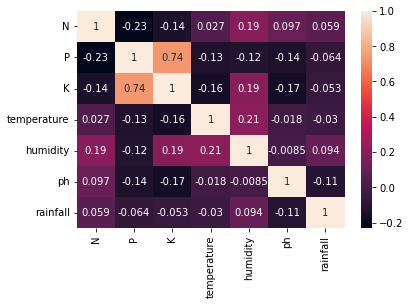

In [10]:
sns.heatmap(s,annot=True)

In [13]:
features=df[['N','P','K','temperature','humidity','ph','rainfall']]
target=df['label']

In [14]:
target

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [15]:
acc=[]
model=[]

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(features,target,test_size= 0.2)

# Decision Tree


In [39]:
from sklearn.tree import DecisionTreeClassifier


In [42]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train,Y_train)
predicted = DecisionTree.predict(X_test)
x = metrics.accuracy_score(Y_test,predicted)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's accuracy is", x * 100)

print(classification_report(Y_test,predicted))

Decision Tree's accuracy is 98.18181818181819
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        14
      banana       1.00      1.00      1.00        22
   blackgram       1.00      0.95      0.98        21
    chickpea       1.00      1.00      1.00        24
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        16
      cotton       0.92      1.00      0.96        24
      grapes       1.00      1.00      1.00        20
        jute       0.80      0.91      0.85        22
 kidneybeans       1.00      1.00      1.00        24
      lentil       1.00      1.00      1.00        16
       maize       0.93      1.00      0.97        14
       mango       1.00      1.00      1.00        16
   mothbeans       1.00      1.00      1.00        27
    mungbean       1.00      1.00      1.00        14
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00  

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [46]:
LogReg = LogisticRegression()
LogReg.fit(X_train,Y_train)

predicted = LogReg.predict(X_test)
x = metrics.accuracy_score(Y_test,predicted)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression Accuracy is",x * 100)
print(classification_report(Y_test,predicted))

Logistic Regression Accuracy is 94.77272727272728
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        14
      banana       1.00      1.00      1.00        22
   blackgram       0.85      0.81      0.83        21
    chickpea       1.00      1.00      1.00        24
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        16
      cotton       0.92      1.00      0.96        24
      grapes       1.00      1.00      1.00        20
        jute       0.70      0.86      0.78        22
 kidneybeans       1.00      1.00      1.00        24
      lentil       0.94      1.00      0.97        16
       maize       1.00      0.79      0.88        14
       mango       0.94      1.00      0.97        16
   mothbeans       0.89      0.89      0.89        27
    mungbean       0.93      1.00      0.97        14
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.

# Support Vector Machines

In [47]:
from sklearn.svm import SVC

In [48]:
SVM = SVC()
SVM.fit(X_train,Y_train)

predicted = SVM.predict(X_test)
x = metrics.accuracy_score(Y_test,predicted)
acc.append(x)
model.append('SVM')
print('SVM accuracy score is',x * 100)
print(classification_report(Y_test,predicted))

SVM accuracy score is 95.45454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        14
      banana       1.00      1.00      1.00        22
   blackgram       0.91      1.00      0.95        21
    chickpea       1.00      1.00      1.00        24
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        16
      cotton       0.96      1.00      0.98        24
      grapes       1.00      1.00      1.00        20
        jute       0.61      1.00      0.76        22
 kidneybeans       0.92      1.00      0.96        24
      lentil       0.94      1.00      0.97        16
       maize       1.00      0.93      0.96        14
       mango       1.00      1.00      1.00        16
   mothbeans       1.00      0.96      0.98        27
    mungbean       1.00      1.00      1.00        14
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
predicted = RF.predict(X_test)
x = metrics.accuracy_score(Y_test,predicted)
acc.append(x)
model.append('Random Forest')
print("Random Forest Accuracy is ",x * 100)
print(classification_report(Y_test,predicted))

Random Forest Accuracy is  99.31818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        14
      banana       1.00      1.00      1.00        22
   blackgram       1.00      0.95      0.98        21
    chickpea       1.00      1.00      1.00        24
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        16
      cotton       1.00      1.00      1.00        24
      grapes       1.00      1.00      1.00        20
        jute       0.92      1.00      0.96        22
 kidneybeans       1.00      1.00      1.00        24
      lentil       1.00      1.00      1.00        16
       maize       0.93      1.00      0.97        14
       mango       1.00      1.00      1.00        16
   mothbeans       1.00      1.00      1.00        27
    mungbean       1.00      1.00      1.00        14
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00   

# Naive bayes

In [66]:
from sklearn.naive_bayes import GaussianNB

In [67]:
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train,Y_train)

predicted = Naive_Bayes.predict(X_test)
X = metrics.accuracy_score(Y_test,predicted)
acc.append(x)
model.append('Naive Bayes')
print('Naive Bayes accuracy is',x * 100)

print(classification_report(Y_test,predicted))

Naive Bayes accuracy is 99.31818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        14
      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        21
    chickpea       1.00      1.00      1.00        24
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        16
      cotton       1.00      1.00      1.00        24
      grapes       1.00      1.00      1.00        20
        jute       0.88      1.00      0.94        22
 kidneybeans       1.00      1.00      1.00        24
      lentil       1.00      1.00      1.00        16
       maize       1.00      1.00      1.00        14
       mango       1.00      1.00      1.00        16
   mothbeans       1.00      1.00      1.00        27
    mungbean       1.00      1.00      1.00        14
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      

# ACCURACY COMPARISION

<AxesSubplot:title={'center':'Accuracy Comparision'}, xlabel='Accuracy', ylabel='Algorithms'>

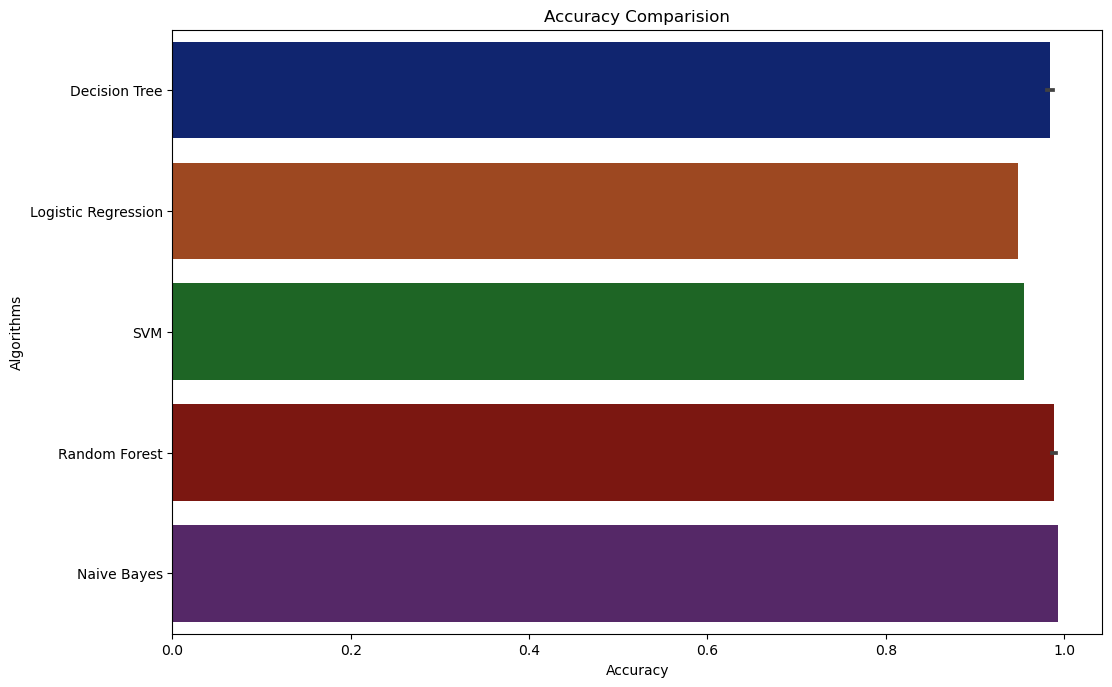

In [68]:
plt.figure(figsize = [12,8],dpi = 100)
plt.title('Accuracy Comparision')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x = acc,y = model,palette = 'dark')

# prediction

In [70]:
data = np.array([[10,42, 43, 23.603016, 60.3, 6.7, 14]])
prediction = RF.predict(data)
print(prediction)

['mothbeans']
